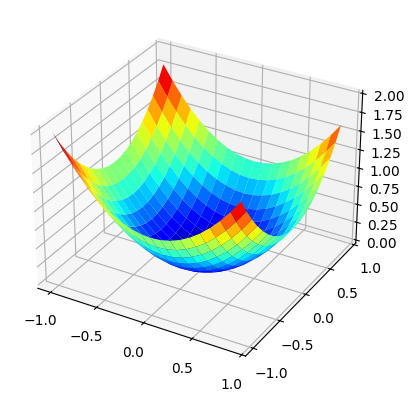

In [1]:
# Código para el gráfico 3D de la función objetivo
from numpy import arange, meshgrid
from matplotlib import pyplot as plt

# Función objetivo
def objective(x, y):
    return x**2.0 + y**2.0

# Definir rango para los inputs
r_min, r_max = -1.0, 1.0

# Muestra el rango con incrementos de 0.1
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)

# Crear la malla de puntos
x, y = meshgrid(xaxis, yaxis)

# Calcular los valores de la función objetivo
results = objective(x, y)

# Crear la figura y el eje 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, results, cmap='jet')

# Mostrar el gráfico
plt.show()

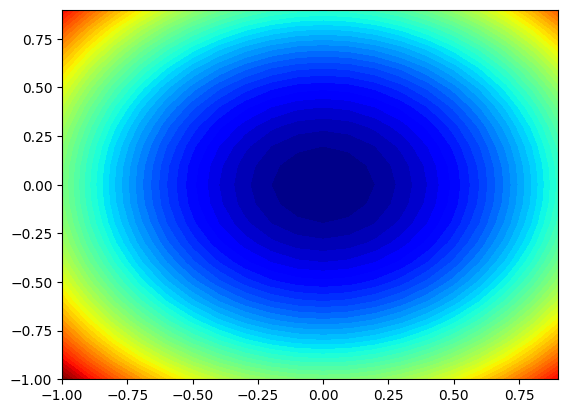

In [3]:
# Código para el gráfico de contorno 2D de la función objetivo
from numpy import asarray, arange, meshgrid
from matplotlib import pyplot as plt

# Función objetivo
def objective(x, y):
    return x**2.0 + y**2.0

# Definir los límites para x e y
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# Rango para muestrear la entrada
xaxis = arange(bounds[0, 0], bounds[0, 1], 0.1)
yaxis = arange(bounds[1, 0], bounds[1, 1], 0.1)

# Crear la malla
x, y = meshgrid(xaxis, yaxis)

# Calcular los valores de la función
results = objective(x, y)

# Crear gráfico de contorno con 50 niveles y colormap jet
plt.contourf(x, y, results, levels=50, cmap='jet')

# Mostrar el gráfico
plt.show()

In [2]:
from math import sqrt
from numpy import asarray
from numpy.random import rand, seed

# función objetivo
def objective(x, y):
    return x**2.0 + y**2.0

# derivada de la función objetivo
def derivative(x, y):
    return asarray([2.0 * x, 2.0 * y])

# algoritmo Adam para descenso por gradiente
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    # generar punto inicial aleatorio dentro de los límites
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    # inicializar momentos de primer y segundo orden
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]

    for t in range(n_iter):
        # calcular gradiente en x(t)
        g = derivative(x[0], x[1])
        for i in range(len(x)):
            # actualizar momento de primer orden m(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # actualizar momento de segundo orden v(t)
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # corregir sesgo en m y v
            mhat = m[i] / (1.0 - beta1**(t + 1))
            vhat = v[i] / (1.0 - beta2**(t + 1))
            # actualizar variable x
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        # evaluar función objetivo en nuevo x
        score = objective(x[0], x[1])
        print(f'>{t} f({x}) = {score:.5f}')
    return x, score

# fijar semilla para reproducibilidad
seed(1)

# definir límites del espacio de búsqueda
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# definir número de iteraciones
n_iter = 60

# tasa de aprendizaje (step size)
alpha = 0.02

# coeficiente para momento de primer orden
beta1 = 0.8

# coeficiente para momento de segundo orden
beta2 = 0.999

# ejecutar Adam
best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)

print('Done!')
print(f'f({best}) = {score}')

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(

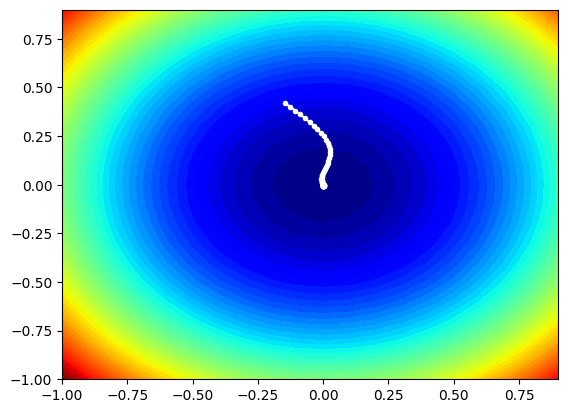

In [5]:
from math import sqrt
from numpy import asarray, arange, meshgrid
from numpy.random import rand, seed
from matplotlib import pyplot

# Función objetivo
def objective(x, y):
    return x**2.0 + y**2.0

# Derivada de la función objetivo (gradiente)
def derivative(x, y):
    return asarray([2.0 * x, 2.0 * y])

# Algoritmo de descenso por gradiente con Adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    solutions = list()
    # Punto inicial aleatorio dentro de los límites
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    # Inicializar momentos m y v
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]

    for t in range(n_iter):
        # Calcular gradiente
        g = derivative(x[0], x[1])
        # Actualizar por cada variable
        for i in range(bounds.shape[0]):
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            mhat = m[i] / (1.0 - beta1**(t + 1))
            vhat = v[i] / (1.0 - beta2**(t + 1))
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        score = objective(x[0], x[1])
        solutions.append(x.copy())
        print(f'>{t} f({x}) = {score:.5f}')
    return solutions

# Semilla para reproducibilidad
seed(1)

# Definir límites
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# Parámetros del algoritmo
n_iter = 60
alpha = 0.02
beta1 = 0.8
beta2 = 0.999

# Ejecutar Adam
solutions = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)

# Crear rango para graficar función
xaxis = arange(bounds[0, 0], bounds[0, 1], 0.1)
yaxis = arange(bounds[1, 0], bounds[1, 1], 0.1)

# Malla para la función
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)

# Graficar contorno
pyplot.contourf(x, y, results, levels=50, cmap='jet')

# Graficar trayectoria de soluciones
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')

# Mostrar gráfico
pyplot.show()
